
Prix prédit pour la nouvelle maison: 416,977€

Importance des caractéristiques:
      caractéristique  importance
0             Surface    0.942941
2     Distance centre    0.030722
1  Nombre de chambres    0.026337


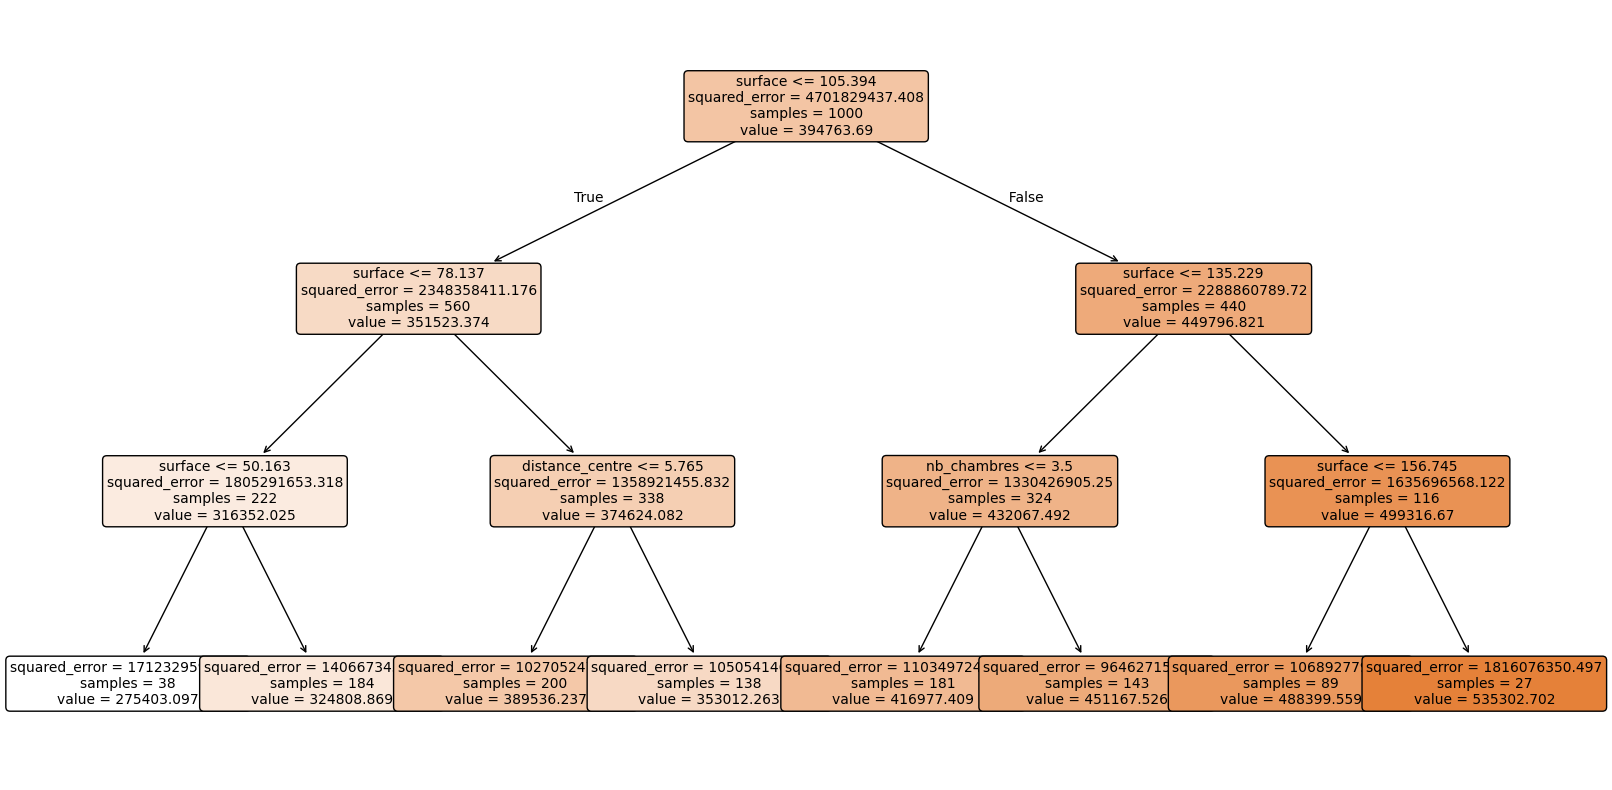

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


np.random.seed(42)
n_samples = 1000

surface = np.random.normal(100, 30, n_samples)
nb_chambres = np.random.randint(1, 6, n_samples)
distance_centre = np.random.normal(5, 2, n_samples)


prix_base = 200000 
prix = (
    prix_base +
    surface * 2000 +
    nb_chambres * 15000 +
    distance_centre * -10000
    + np.random.normal(0, 20000, n_samples)
)

data = pd.DataFrame({
    'surface': surface,
    'nb_chambres': nb_chambres,
    'distance_centre': distance_centre,
    'prix': prix
})

X = data[['surface', 'nb_chambres', 'distance_centre']]
y = data['prix']

model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=['surface', 'nb_chambres', 'distance_centre'],
          filled=True, 
          rounded=True,
          fontsize=10)


nouvelle_maison = pd.DataFrame({
    'surface': [120],
    'nb_chambres': [3],
    'distance_centre': [4]
})

prix_predit = model.predict(nouvelle_maison)[0]
print(f"\nPrix prédit pour la nouvelle maison: {prix_predit:,.0f}€")


importances = pd.DataFrame({
    'caractéristique': ['Surface', 'Nombre de chambres', 'Distance centre'],
    'importance': model.feature_importances_
})
print("\nImportance des caractéristiques:")
print(importances.sort_values('importance', ascending=False))

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Création d'un dataset exemple de salaires
np.random.seed(42)
n_samples = 1000

# Création des caractéristiques
experience = np.random.uniform(0, 20, n_samples)  # années d'expérience
education = np.random.randint(0, 5, n_samples)    # niveau d'études (0-4)
heures_semaine = np.random.normal(40, 10, n_samples)  # heures travaillées

# Création du salaire avec des relations non-linéaires
salaire_base = 30000
salaire = (
    salaire_base +
    (experience ** 1.5) * 1000 +  # relation non-linéaire avec l'expérience
    education * 5000 +            # relation linéaire avec l'éducation
    (heures_semaine - 40) * 100   # prime pour heures sup
    + np.random.normal(0, 5000, n_samples)  # bruit aléatoire
)

# Création du DataFrame
data = pd.DataFrame({
    'experience': experience,
    'education': education,
    'heures_semaine': heures_semaine,
    'salaire': salaire
})

# Division train/test
X = data[['experience', 'education', 'heures_semaine']]
y = data['salaire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données (important pour SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création des modèles
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Comparaison des modèles
results = {}
for name, model in models.items():
    # Utilisation des données scalées pour SVM, données normales pour les autres
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'R2': r2
    }

# Affichage des résultats
print("\nRésultats des modèles:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:,.2f}")
    print(f"R²: {metrics['R2']:.4f}")

# Exemple de prédiction pour un nouveau candidat
nouveau_candidat = pd.DataFrame({
    'experience': [10],
    'education': [3],
    'heures_semaine': [45]
})

print("\nPrédictions pour le nouveau candidat:")
for name, model in models.items():
    if name == 'SVM':
        prediction = model.predict(scaler.transform(nouveau_candidat))[0]
    else:
        prediction = model.predict(nouveau_candidat)[0]
    print(f"{name}: {prediction:,.0f}€")

# Analyse de l'importance des features pour certains modèles
print("\nImportance des features:")

if hasattr(models['Random Forest'], 'feature_importances_'):
    importances_rf = pd.DataFrame({
        'feature': X.columns,
        'importance': models['Random Forest'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nRandom Forest - Importance des features:")
    print(importances_rf)

if hasattr(models['Gradient Boosting'], 'feature_importances_'):
    importances_gb = pd.DataFrame({
        'feature': X.columns,
        'importance': models['Gradient Boosting'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nGradient Boosting - Importance des features:")
    print(importances_gb)


Résultats des modèles:

Linear Regression:
MSE: 39,117,027.47
R²: 0.9517

Decision Tree:
MSE: 38,967,933.21
R²: 0.9518

Random Forest:
MSE: 34,501,969.28
R²: 0.9574

Gradient Boosting:
MSE: 30,647,311.21
R²: 0.9621

SVM:
MSE: 805,211,910.85
R²: 0.0048

Prédictions pour le nouveau candidat:
Linear Regression: 81,558€
Decision Tree: 80,385€
Random Forest: 78,841€
Gradient Boosting: 76,459€
SVM: 71,848€

Importance des features:

Random Forest - Importance des features:
          feature  importance
0      experience    0.944282
1       education    0.053678
2  heures_semaine    0.002041

Gradient Boosting - Importance des features:
          feature  importance
0      experience    0.927973
1       education    0.060205
2  heures_semaine    0.011822
